https://twitter.com/dannchu/status/1443524638252810248

  0.045105 seconds (133.11 k allocations: 8.295 MiB, 65.52% compilation time)
  0.024206 seconds
  0.035728 seconds
  0.048199 seconds
  0.059187 seconds
  0.071035 seconds
  0.083938 seconds
  0.095512 seconds
  0.105025 seconds
  0.113179 seconds


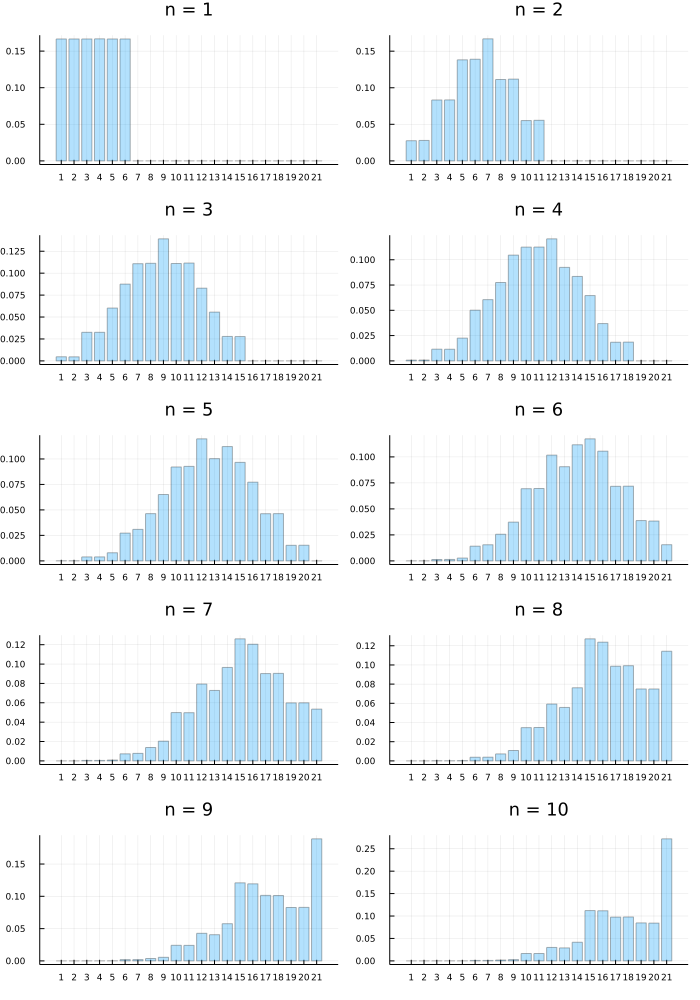

In [1]:
using Plots
default(titlefontsize=12, tickfontsize=6)

function f!(a, n)
    a .= false
    s = 0
    @inbounds for _ in 1:n
        i = rand(1:6)
        a[i] && continue
        a[i] = true
        s += i
        all(a) && break
    end
    s
end

function countf!(X, a, n, L)
    X .= 0
    for _ in 1:L
        @inbounds X[f!(a, n)] +=1
    end
    X
end

X = zeros(Int, 21)
a = falses(6)
L = 10^6
PP = []
for n in 1:10
    @time countf!(X, a, n, L); flush(stdout)
    P = bar(1:21, X/L; alpha=0.3, xtick=1:21, label="", title="n = $n")
    push!(PP, P)
end
plot(PP...; layout=(5, 2), size=(700, 1000))

  0.076244 seconds (315.72 k allocations: 18.809 MiB, 99.92% compilation time)
  0.040788 seconds (104.59 k allocations: 6.150 MiB, 28.96% gc time, 99.95% compilation time)
  0.032298 seconds (126.81 k allocations: 7.415 MiB, 99.59% compilation time)
  0.034405 seconds (138.80 k allocations: 7.969 MiB, 99.72% compilation time)
  0.036719 seconds (157.21 k allocations: 8.951 MiB, 99.41% compilation time)
  0.040113 seconds (172.68 k allocations: 9.736 MiB, 97.13% compilation time)
  0.060077 seconds (187.91 k allocations: 10.466 MiB, 17.68% gc time, 87.36% compilation time)
  0.102316 seconds (204.51 k allocations: 11.267 MiB, 45.94% compilation time)
  0.372513 seconds (222.02 k allocations: 12.143 MiB, 12.93% compilation time)
  2.105733 seconds (240.52 k allocations: 13.084 MiB, 2.40% compilation time)


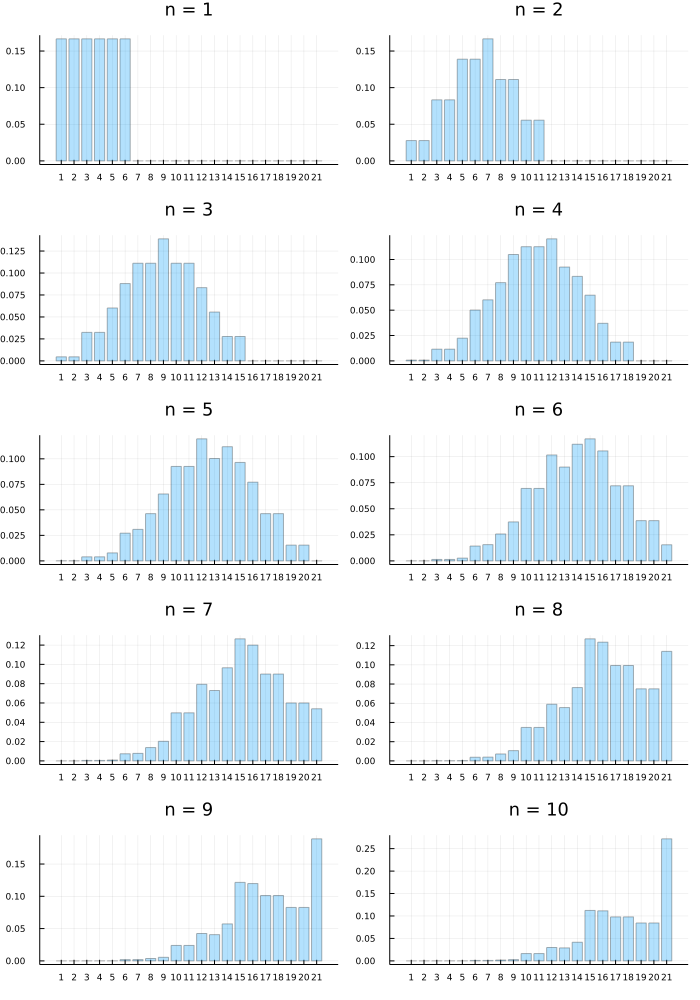

In [2]:
using Plots
default(titlefontsize=12, tickfontsize=6)

function g!(X, a, iter::Iterators.ProductIterator)
    X .= 0
    @inbounds for t in iter
        a .= false
        s = 0
        for i in t
            a[i] && continue
            a[i] = true
            s += i
            all(a) && break
        end
        X[s] += 1
    end
    X
end

function g!(X, a, n)
    iter = Iterators.product(ntuple(_ -> 1:6, n)...)
    g!(X, a, iter)
end

X = zeros(Int, 21)
a = falses(6)
PP = []
for n in 1:10
    @time g!(X, a, n); flush(stdout)
    P = bar(1:21, X/6^n; alpha=0.3, xtick=1:21, label="", title="n = $n")
    push!(PP, P)
end
plot(PP...; layout=(5, 2), size=(700, 1000))

  0.000015 seconds (3 allocations: 96 bytes)
  0.000009 seconds (4 allocations: 160 bytes)
  0.000006 seconds (5 allocations: 224 bytes)
  0.000024 seconds (6 allocations: 288 bytes)
  0.000184 seconds (7 allocations: 352 bytes)
  0.001067 seconds (8 allocations: 416 bytes)
  0.007446 seconds (9 allocations: 480 bytes)
  0.052544 seconds (10 allocations: 544 bytes)
  0.320978 seconds (11 allocations: 608 bytes)
  2.031211 seconds (12 allocations: 672 bytes)


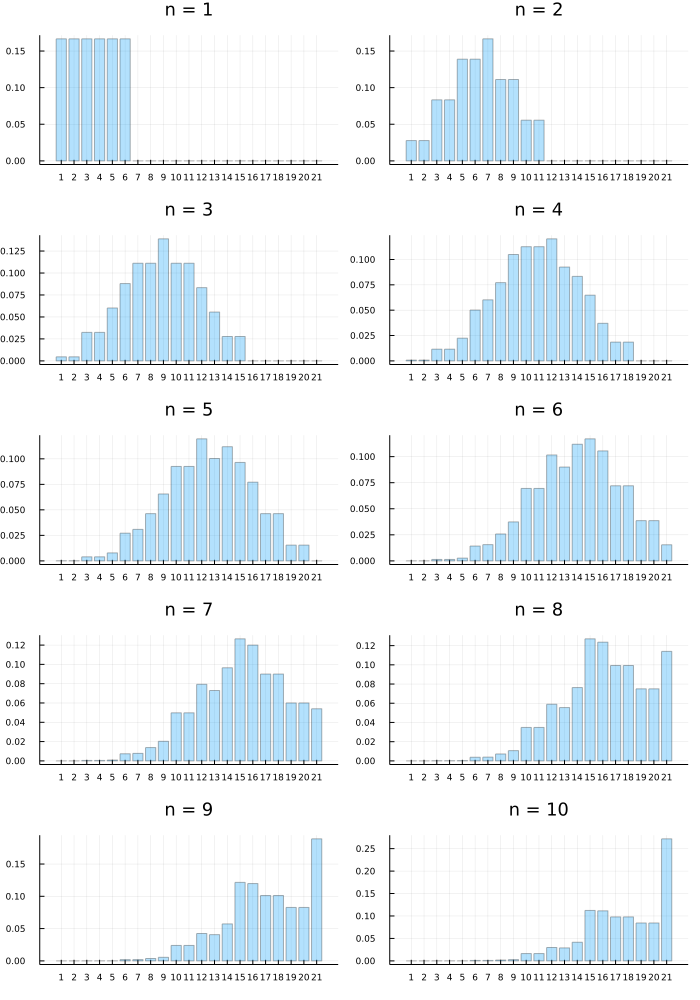

In [3]:
X = zeros(Int, 21)
a = falses(6)
PP = []
for n in 1:10
    @time g!(X, a, n); flush(stdout)
    P = bar(1:21, X/6^n; alpha=0.3, xtick=1:21, label="", title="n = $n")
    push!(PP, P)
end
plot(PP...; layout=(5, 2), size=(700, 1000))

In [4]:
@code_warntype g!(X, a, Iterators.product(ntuple(_ -> 1:6, 10)...))

Variables
  #self#::Core.Const(g!)
  X::Vector{Int64}
  a::BitVector
  iter::Base.Iterators.ProductIterator{NTuple{10, UnitRange{Int64}}}
  @_5::Union{Nothing, Tuple{NTuple{10, Int64}, NTuple{10, Tuple{Int64, Int64}}}}
  val::Nothing
  @_7::Union{Nothing, Tuple{Int64, Int64}}
  t::NTuple{10, Int64}
  s::Int64
  i::Int64

Body::Vector{Int64}
1 ──       Core.NewvarNode(:(val))
│    %2  = Base.broadcasted(Base.identity, 0)::Core.Const(Base.Broadcast.Broadcasted(identity, (0,)))
│          Base.materialize!(X, %2)
│          $(Expr(:inbounds, true))
│    %5  = iter::Base.Iterators.ProductIterator{NTuple{10, UnitRange{Int64}}}
│          (@_5 = Base.iterate(%5))
│    %7  = (@_5 === nothing)::Bool
│    %8  = Base.not_int(%7)::Bool
└───       goto #11 if not %8
2 ┄─ %10 = @_5::Tuple{NTuple{10, Int64}, NTuple{10, Tuple{Int64, Int64}}}::Tuple{NTuple{10, Int64}, NTuple{10, Tuple{Int64, Int64}}}
│          (t = Core.getfield(%10, 1))
│    %12 = Core.getfield(%10, 2)::NTuple{10, Tuple{Int64, Int64